### Single-cell RNA sequencing analysis of peripheral blood mononuclear cells (PBMCs) from COVID-19 patients and healthy controls: identifying cellular and molecular mechanisms of immune dysregulation

#### Research objectives:

1. To characterize the cellular composition and gene expression profiles of PBMCs from COVID-19 patients and healthy controls using single-cell RNA sequencing (scRNA-seq).
2. To identify changes in immune cell populations and gene expression profiles associated with COVID-19 infection and disease severity.
3. To investigate the cellular and molecular mechanisms underlying immune dysregulation in COVID-19, including changes in T cell, B cell, and myeloid cell function.
4. To identify potential biomarkers for COVID-19 diagnosis, prognosis, and therapeutic targeting.

#### Research questions:

1. What are the changes in immune cell populations and gene expression profiles in PBMCs from COVID-19 patients compared to healthy controls?
2. How do T cell, B cell, and myeloid cell subsets contribute to immune dysregulation in COVID-19?
3. What are the key signaling pathways and transcriptional regulators involved in COVID-19 immune dysregulation?
4. Can scRNA-seq identify potential biomarkers for COVID-19 diagnosis, prognosis, and therapeutic targeting?

#### Experimental design:

1. Collect PBMCs from COVID-19 patients (n=10-20) and healthy controls (n=10-20).
2. Perform scRNA-seq using a platform such as 10x Genomics or Drop-seq.
3. Analyze data using bioinformatics pipelines, including cell type identification, differential gene expression, and trajectory analysis.
4. Validate findings using orthogonal methods, such as flow cytometry and qRT-PCR.

#### Potential impact:

1. Elucidate the cellular and molecular mechanisms underlying immune dysregulation in COVID-19.
2. Identify potential biomarkers for COVID-19 diagnosis, prognosis, and therapeutic targeting.
3. Inform the development of novel therapeutic strategies for COVID-19.


    1. Data Pre-processing 
Data source: "https://datasets.cellxgene.cziscience.com/c26ae673-1220-40e9-960f-80701e11a175.h5ad"

In [5]:
# Download the dataset from CZI
# import requests

# url = "https://datasets.cellxgene.cziscience.com/c26ae673-1220-40e9-960f-80701e11a175.h5ad"
# response = requests.get(url)

# with open("c26ae673-1220-40e9-960f-80701e11a175.h5ad", "wb") as file:
#     file.write(response.content)

# file.rename("c26ae673-1220-40e9-960f-80701e11a175.h5ad", "pbmc_covid19.h5ad")

In [6]:
# Import required packages
import scanpy as sc
import anndata as ad
import pandas as pd
import celltypist
import matplotlib.pyplot as plt
from celltypist import models
import numpy as np
#import scarches as sca
import seaborn as sns
from scipy.sparse import csr_matrix
import decoupler as dc

In [7]:
# Load the dataset
pbmc_covid19 = sc.read_h5ad("pbmc_covid19.h5ad")
pbmc_covid19 

AnnData object with n_obs × n_vars = 43512 × 21649
    obs: 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'log1p', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [8]:
# View various obs attributes of the dataset
pbmc_covid19.obs.head()

Dataset        sample  \
Lee-AAACCCAAGAATGTTG-12  Lee et al._Science Immunology    Lee_nCoV 6   
Lee-AAACCCAAGCATTGTC-19  Lee et al._Science Immunology  Lee_Normal 4   
Lee-AAACCCAAGGCCTGCT-12  Lee et al._Science Immunology    Lee_nCoV 6   
Lee-AAACCCAAGGGCAATC-1   Lee et al._Science Immunology    Lee_nCoV 1   
Lee-AAACCCAAGTAAGGGA-18  Lee et al._Science Immunology   Lee_nCoV 10   

                                disease_original  \
Lee-AAACCCAAGAATGTTG-12  COVID-19 Mild/Remission   
Lee-AAACCCAAGCATTGTC-19                  Healthy   
Lee-AAACCCAAGGCCTGCT-12  COVID-19 Mild/Remission   
Lee-AAACCCAAGGGCAATC-1           COVID-19 Severe   
Lee-AAACCCAAGTAAGGGA-18  COVID-19 Mild/Remission   

                                                    disease_general  \
Lee-AAACCCAAGAATGTTG-12  COVID-19 Moderate/Mild/Early stage/NonVent   
Lee-AAACCCAAGCATTGTC-19                             Healthy/Control   
Lee-AAACCCAAGGCCTGCT-12  COVID-19 Moderate/Mild/Early stage/NonVent   
Lee-AAACCCAAGGGCAATC-1              COVID-19 Severe/Late stage/Vent   
Lee-AAACCCAAGTAAGGGA-18  COVID-19 Moderate/Mild/Early stage/NonVent   

                        COVID-19 Condition        Lineage   Cell.group  \
Lee-AAACCCAAGAATGTTG-12      mild COVID-19  Lymphoid_T/NK      NK cell   
Lee-AAACCCAAGCATTGTC-19      Healthy donor  Lymphoid_T/NK  CD4+ T cell   
Lee-AAACCCAAGGCCTGCT-12      mild COVID-19  Lymphoid_T/NK      NK cell   
Lee-AAACCCAAGGGCAATC-1     severe COVID-19     Lymphoid_B       B cell   
Lee-AAACCCAAGTAAGGGA-18      mild COVID-19        Myeloid          cDC   

                        Cell.class_reannotated  n_genes   n_counts  ...  \
Lee-AAACCCAAGAATGTTG-12                     NK     1910  15624.013  ...   
Lee-AAACCCAAGCATTGTC-19               CD4+ Tcm     2294  17627.025  ...   
Lee-AAACCCAAGGCCTGCT-12                     NK     1537  13406.672  ...   
Lee-AAACCCAAGGGCAATC-1          B intermediate     3311  22477.857  ...   
Lee-AAACCCAAGTAAGGGA-18                    cDC     3709  24287.799  ...   

                         suspension_type tissue_type  \
Lee-AAACCCAAGAATGTTG-12             cell      tissue   
Lee-AAACCCAAGCATTGTC-19             cell      tissue   
Lee-AAACCCAAGGCCTGCT-12             cell      tissue   
Lee-AAACCCAAGGGCAATC-1              cell      tissue   
Lee-AAACCCAAGTAAGGGA-18             cell      tissue   

                                                              cell_type  \
Lee-AAACCCAAGAATGTTG-12                             natural killer cell   
Lee-AAACCCAAGCATTGTC-19  central memory CD4-positive, alpha-beta T cell   
Lee-AAACCCAAGGCCTGCT-12                             natural killer cell   
Lee-AAACCCAAGGGCAATC-1                        transitional stage B cell   
Lee-AAACCCAAGTAAGGGA-18                     conventional dendritic cell   

                             assay   disease     sex tissue  \
Lee-AAACCCAAGAATGTTG-12  10x 3' v3  COVID-19  female  blood   
Lee-AAACCCAAGCATTGTC-19  10x 3' v3    normal    male  blood   
Lee-AAACCCAAGGCCTGCT-12  10x 3' v3  COVID-19  female  blood   
Lee-AAACCCAAGGGCAATC-1   10x 3' v3  COVID-19    male  blood   
Lee-AAACCCAAGTAAGGGA-18  10x 3' v3  COVID-19    male  blood   

                        self_reported_ethnicity  development_stage  \
Lee-AAACCCAAGAATGTTG-12                 unknown  38-year-old stage   
Lee-AAACCCAAGCATTGTC-19                 unknown  63-year-old stage   
Lee-AAACCCAAGGCCTGCT-12                 unknown  38-year-old stage   
Lee-AAACCCAAGGGCAATC-1                  unknown  63-year-old stage   
Lee-AAACCCAAGTAAGGGA-18                 unknown  61-year-old stage   

                        observation_joinid  
Lee-AAACCCAAGAATGTTG-12         PH+}Vq?U6U  
Lee-AAACCCAAGCATTGTC-19         1<0D}mq%JN  
Lee-AAACCCAAGGCCTGCT-12         sBoj%v#<|x  
Lee-AAACCCAAGGGCAATC-1          >rRZ7F&MT9  
Lee-AAACCCAAGTAAGGGA-18         79ZqcauP4%  

[5 rows x 31 columns]

In [9]:
# View various var attributes of the dataset
pbmc_covid19.var.head()

n_cells  feature_is_filtered     feature_name  \
ENSG00000161920     6037                False            MED11   
ENSG00000272622        5                False  ENSG00000272622   
ENSG00000122335     2420                False           SERAC1   
ENSG00000175548     1142                False           ALG10B   
ENSG00000176340    45305                False            COX8A   

                feature_reference feature_biotype feature_length  \
ENSG00000161920    NCBITaxon:9606            gene            754   
ENSG00000272622    NCBITaxon:9606            gene            879   
ENSG00000122335    NCBITaxon:9606            gene           2683   
ENSG00000175548    NCBITaxon:9606            gene           1773   
ENSG00000176340    NCBITaxon:9606            gene            494   

                   feature_type  
ENSG00000161920  protein_coding  
ENSG00000272622          lncRNA  
ENSG00000122335  protein_coding  
ENSG00000175548  protein_coding  
ENSG00000176340  protein_coding

In [10]:
pbmc_covid19.var_names

Index(['ENSG00000161920', 'ENSG00000272622', 'ENSG00000122335',
       'ENSG00000175548', 'ENSG00000176340', 'ENSG00000100330',
       'ENSG00000179846', 'ENSG00000274373', 'ENSG00000204860',
       'ENSG00000141424',
       ...
       'ENSG00000164114', 'ENSG00000224578', 'ENSG00000138756',
       'ENSG00000111052', 'ENSG00000176946', 'ENSG00000150456',
       'ENSG00000259224', 'ENSG00000106780', 'ENSG00000223734',
       'ENSG00000260456'],
      dtype='object', length=21649)

In [11]:
# Assign feature_name as var_names
pbmc_covid19.var_names = pbmc_covid19.var['feature_name']

In [12]:
# Verify if it was successful
pbmc_covid19.var_names

CategoricalIndex(['MED11', 'ENSG00000272622', 'SERAC1', 'ALG10B', 'COX8A',
                  'MTMR3', 'NKPD1', 'ENSG00000274373', 'FAM201A', 'SLC39A6',
                  ...
                  'MAP9', 'HNRNPA1L3', 'BMP2K', 'LIN7A', 'THAP4', 'EEF1AKMT1',
                  'SLC35G6', 'MEGF9', 'LAPTM4A-DT', 'C16orf95'],
                 categories=['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3'], ordered=False, dtype='category', name='feature_name', length=21649)

    2. Quality Control

In [13]:
# Check for unique cell barcodes in the dataset
unique_barcodes = pbmc_covid19.obs_names.is_unique
print(f"Number of unique cell barcodes: {unique_barcodes}")

Number of unique cell barcodes: True


In [14]:
# Check for mitochondrial genes, ribosomal genes, and hemoglobin genes
mt_genes = pbmc_covid19.var_names.str.startswith('MT-')
rb_genes = pbmc_covid19.var_names.str.startswith(('RPS', 'RPL'))
hb_genes = pbmc_covid19.var_names.str.startswith(('HBM', 'HBA', 'HBB', 'HBD', 'HBE', 'HBG', 'HBQ', 'HBP'))

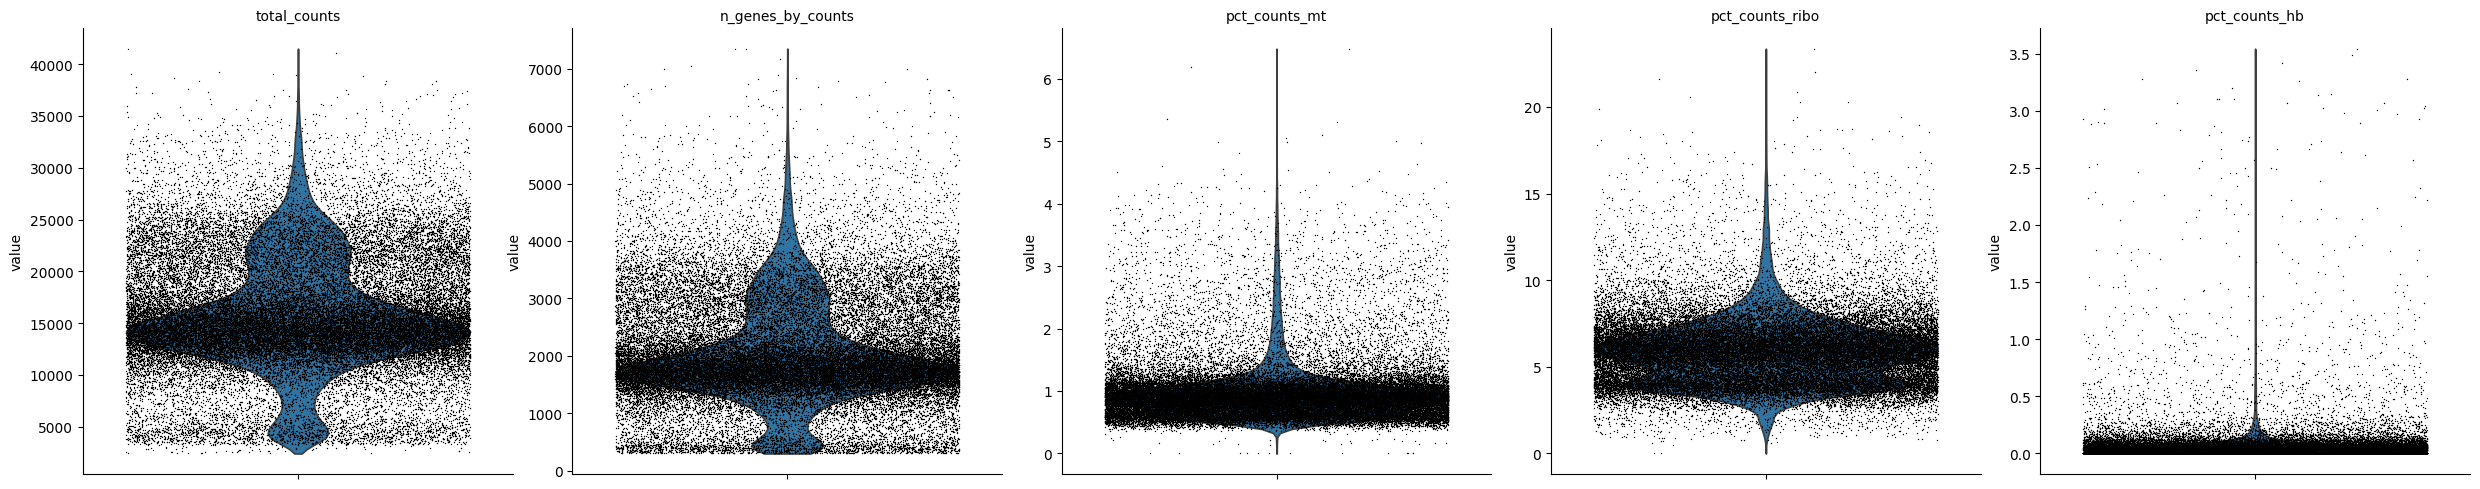

In [15]:
# Create QC metrics and visualize
# calculate_qc_metrics expects names of var columns that contain boolean masks,
# so store the masks in pbmc_covid19.var first and then pass their names.
pbmc_covid19.var['mt'] = mt_genes
pbmc_covid19.var['ribo'] = rb_genes
pbmc_covid19.var['hb'] = hb_genes

sc.pp.calculate_qc_metrics(pbmc_covid19, qc_vars=['mt', 'ribo', 'hb'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(pbmc_covid19, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'], jitter=0.4, multi_panel=True)


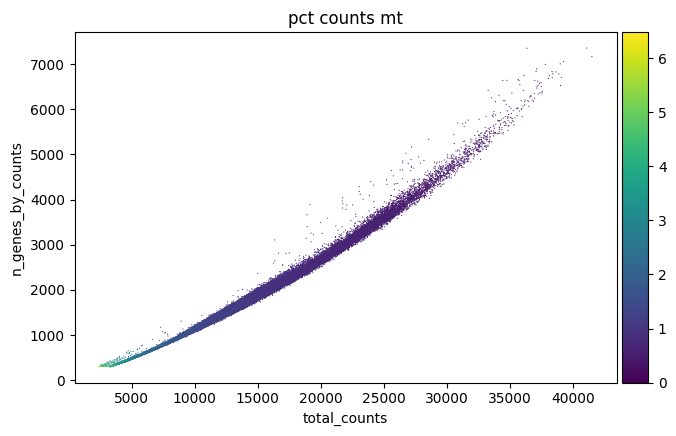

In [16]:
# Number of cells with high mitochondrial gene expression
sc.pl.scatter(pbmc_covid19, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

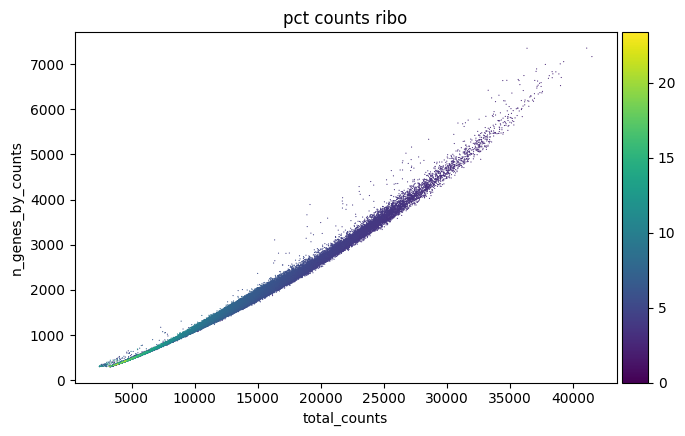

In [17]:
# Display cells with high ribosomal gene expression
sc.pl.scatter(pbmc_covid19, "total_counts", "n_genes_by_counts", color="pct_counts_ribo")

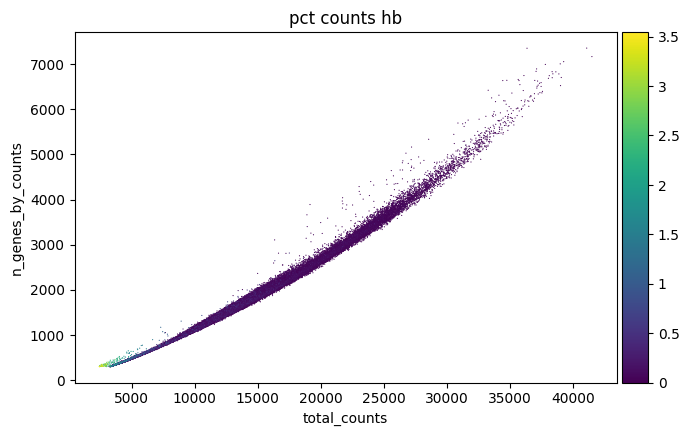

In [18]:
# Display cells with high hb gene expression
sc.pl.scatter(pbmc_covid19, "total_counts", "n_genes_by_counts", color="pct_counts_hb")

In [19]:
# Filter cells based on QC metrics
pbmc_covid19 = pbmc_covid19[
    (pbmc_covid19.obs['n_genes_by_counts'] > 200) &
    (pbmc_covid19.obs['n_genes_by_counts'] < 6000) &
    (pbmc_covid19.obs['pct_counts_mt'] < 5) &
    (pbmc_covid19.obs['pct_counts_ribo'] < 50) &
    (pbmc_covid19.obs['pct_counts_hb'] < 5)
    ]

    3. Normalization and Feature Selection

In [20]:
# Save count data after filtering
pbmc_covid19.layers['counts'] = pbmc_covid19.X.copy()

In [21]:
# Normalization of the data
sc.pp.normalize_total(pbmc_covid19)

# Logarithmize the data
sc.pp.log1p(pbmc_covid19)

In [22]:
# Highly variable gene selection
sc.pp.highly_variable_genes(
    pbmc_covid19,
    n_top_genes=2000,
    batch_key="sample",
    flavor="seurat_v3"
)

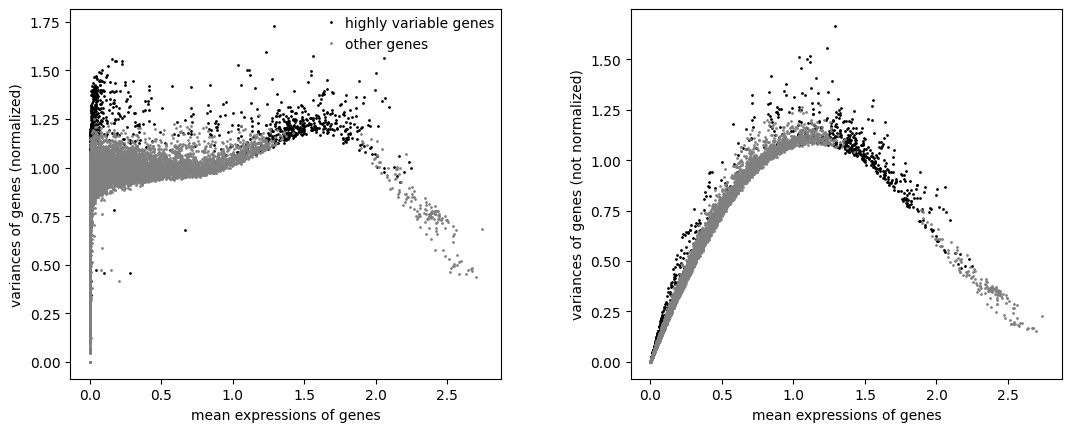

In [23]:
# Plot highly variable genes
sc.pl.highly_variable_genes(pbmc_covid19)

    5. Dimensionality Reduction

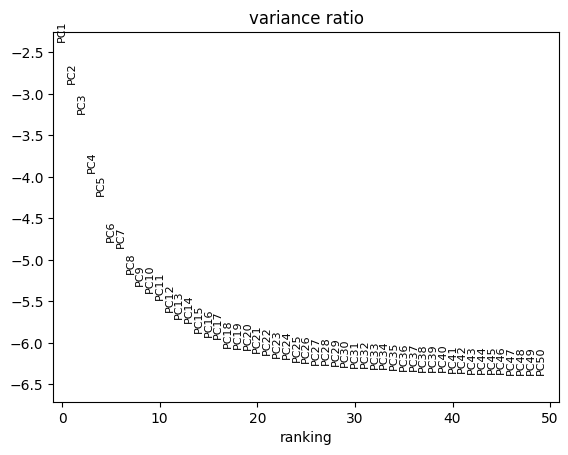

In [24]:
# Reduce the dimensionality of the data using PCA
sc.tl.pca(pbmc_covid19)
sc.pl.pca_variance_ratio(pbmc_covid19, n_pcs=50, log=True)

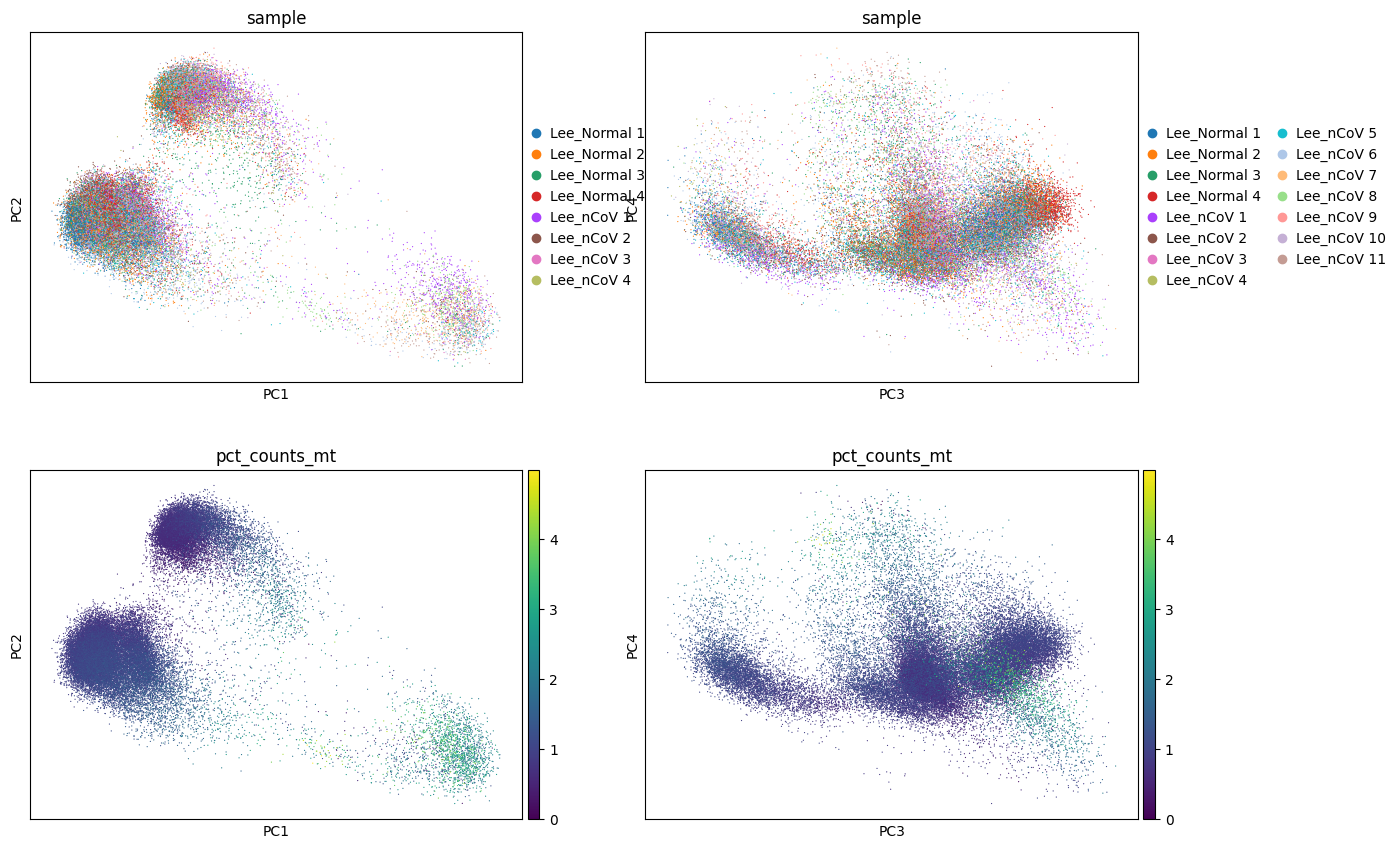

In [25]:
# Visualize some pcs
sc.pl.pca(
    pbmc_covid19,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0,1), (2,3), (0,1), (2,3)],
    ncols=2,
    size=3,
)

In [26]:
# Map samples containing 'Normal' -> control, 'ncov' -> diseased and create subsets
s = pbmc_covid19.obs.get('sample', pd.Series([''] * pbmc_covid19.n_obs, index=pbmc_covid19.obs_names)).astype(str).str.lower()

# Create group column
pbmc_covid19.obs['group'] = 'unknown'
pbmc_covid19.obs.loc[s.str.contains('normal', na=False), 'group'] = 'control'
pbmc_covid19.obs.loc[s.str.contains('ncov', na=False), 'group'] = 'diseased'

# Create subsets using AnnData indexing
pbmc_control = pbmc_covid19[pbmc_covid19.obs['group'] == 'control'].copy()
pbmc_diseased = pbmc_covid19[pbmc_covid19.obs['group'] == 'diseased'].copy()

# Quick check
print(pbmc_covid19.obs['group'].value_counts(dropna=False))
print(f"control: {pbmc_control.n_obs} cells, diseased: {pbmc_diseased.n_obs} cells")

group
diseased    27159
control     16282
Name: count, dtype: int64
control: 16282 cells, diseased: 27159 cells


In [27]:
# verify the group creation
pbmc_covid19.obs.head()

Dataset        sample  \
Lee-AAACCCAAGAATGTTG-12  Lee et al._Science Immunology    Lee_nCoV 6   
Lee-AAACCCAAGCATTGTC-19  Lee et al._Science Immunology  Lee_Normal 4   
Lee-AAACCCAAGGCCTGCT-12  Lee et al._Science Immunology    Lee_nCoV 6   
Lee-AAACCCAAGGGCAATC-1   Lee et al._Science Immunology    Lee_nCoV 1   
Lee-AAACCCAAGTAAGGGA-18  Lee et al._Science Immunology   Lee_nCoV 10   

                                disease_original  \
Lee-AAACCCAAGAATGTTG-12  COVID-19 Mild/Remission   
Lee-AAACCCAAGCATTGTC-19                  Healthy   
Lee-AAACCCAAGGCCTGCT-12  COVID-19 Mild/Remission   
Lee-AAACCCAAGGGCAATC-1           COVID-19 Severe   
Lee-AAACCCAAGTAAGGGA-18  COVID-19 Mild/Remission   

                                                    disease_general  \
Lee-AAACCCAAGAATGTTG-12  COVID-19 Moderate/Mild/Early stage/NonVent   
Lee-AAACCCAAGCATTGTC-19                             Healthy/Control   
Lee-AAACCCAAGGCCTGCT-12  COVID-19 Moderate/Mild/Early stage/NonVent   
Lee-AAACCCAAGGGCAATC-1              COVID-19 Severe/Late stage/Vent   
Lee-AAACCCAAGTAAGGGA-18  COVID-19 Moderate/Mild/Early stage/NonVent   

                        COVID-19 Condition        Lineage   Cell.group  \
Lee-AAACCCAAGAATGTTG-12      mild COVID-19  Lymphoid_T/NK      NK cell   
Lee-AAACCCAAGCATTGTC-19      Healthy donor  Lymphoid_T/NK  CD4+ T cell   
Lee-AAACCCAAGGCCTGCT-12      mild COVID-19  Lymphoid_T/NK      NK cell   
Lee-AAACCCAAGGGCAATC-1     severe COVID-19     Lymphoid_B       B cell   
Lee-AAACCCAAGTAAGGGA-18      mild COVID-19        Myeloid          cDC   

                        Cell.class_reannotated  n_genes   n_counts  ...  \
Lee-AAACCCAAGAATGTTG-12                     NK     1910  15624.013  ...   
Lee-AAACCCAAGCATTGTC-19               CD4+ Tcm     2294  17627.025  ...   
Lee-AAACCCAAGGCCTGCT-12                     NK     1537  13406.672  ...   
Lee-AAACCCAAGGGCAATC-1          B intermediate     3311  22477.857  ...   
Lee-AAACCCAAGTAAGGGA-18                    cDC     3709  24287.799  ...   

                         observation_joinid n_genes_by_counts  total_counts  \
Lee-AAACCCAAGAATGTTG-12          PH+}Vq?U6U              1908  15607.893555   
Lee-AAACCCAAGCATTGTC-19          1<0D}mq%JN              2286  17566.312500   
Lee-AAACCCAAGGCCTGCT-12          sBoj%v#<|x              1535  13390.227539   
Lee-AAACCCAAGGGCAATC-1           >rRZ7F&MT9              3302  22421.142578   
Lee-AAACCCAAGTAAGGGA-18          79ZqcauP4%              3700  24231.941406   

                        total_counts_mt pct_counts_mt total_counts_ribo  \
Lee-AAACCCAAGAATGTTG-12      119.994591      0.768807        876.016235   
Lee-AAACCCAAGCATTGTC-19      150.407303      0.856226        954.682922   
Lee-AAACCCAAGGCCTGCT-12      130.703156      0.976109        801.511597   
Lee-AAACCCAAGGGCAATC-1       131.657440      0.587202        964.359741   
Lee-AAACCCAAGTAAGGGA-18      135.227890      0.558056        955.597168   

                        pct_counts_ribo total_counts_hb pct_counts_hb  \
Lee-AAACCCAAGAATGTTG-12        5.612648        0.000000      0.000000   
Lee-AAACCCAAGCATTGTC-19        5.434737       14.084135      0.080177   
Lee-AAACCCAAGGCCTGCT-12        5.985795        8.222162      0.061404   
Lee-AAACCCAAGGGCAATC-1         4.301118       20.030045      0.089336   
Lee-AAACCCAAGTAAGGGA-18        3.943543       13.032930      0.053784   

                            group  
Lee-AAACCCAAGAATGTTG-12  diseased  
Lee-AAACCCAAGCATTGTC-19   control  
Lee-AAACCCAAGGCCTGCT-12  diseased  
Lee-AAACCCAAGGGCAATC-1   diseased  
Lee-AAACCCAAGTAAGGGA-18  diseased  

[5 rows x 40 columns]

... storing 'group' as categorical


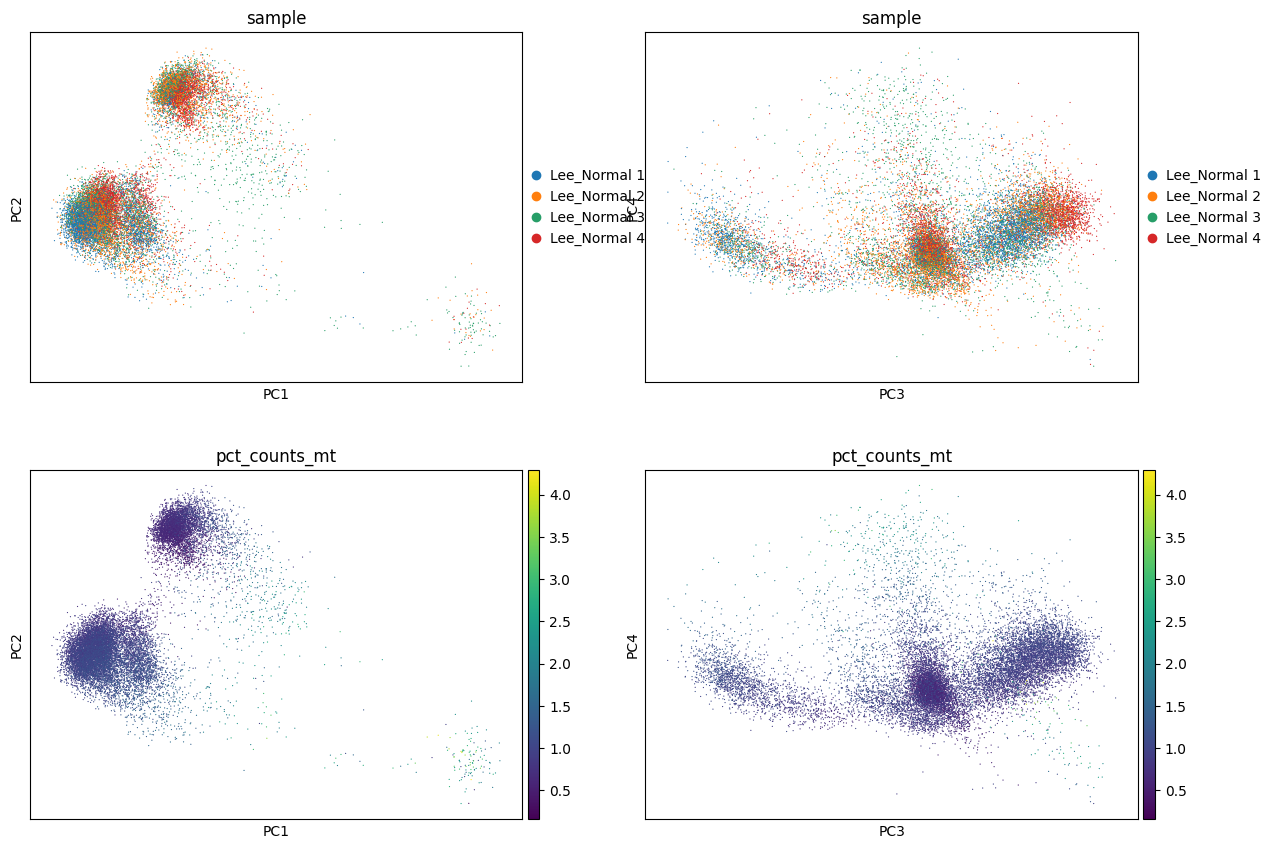

In [28]:
# Visualize pca on controlled cells
sc.pl.pca(
    pbmc_control,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0,1), (2,3), (0,1), (2,3)],
    ncols=2,
    size=3,
)

... storing 'group' as categorical


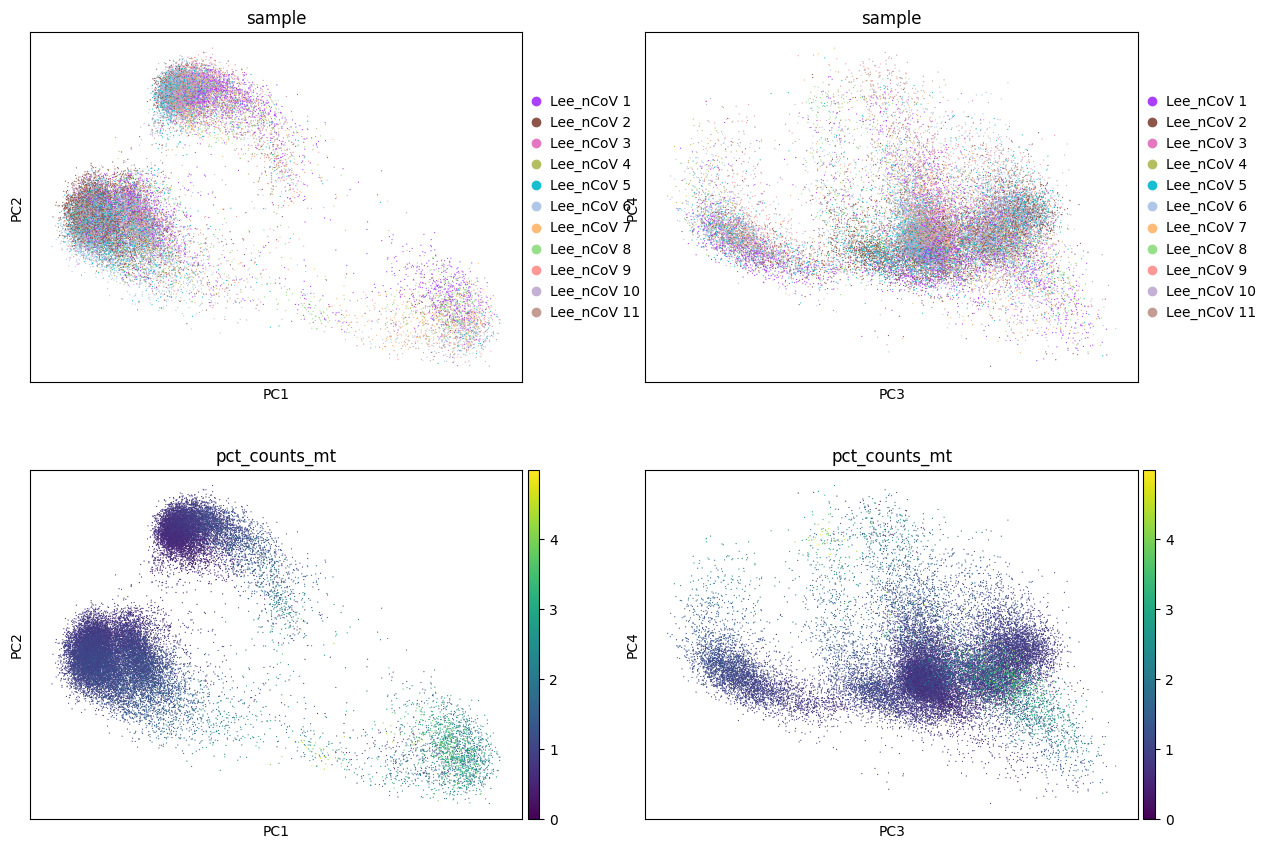

In [29]:
# visualize pca on diseased cells
sc.pl.pca(
    pbmc_diseased,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0,1), (2,3), (0,1), (2,3)],
    ncols=2,
    size=3,
)

    6. Nearest Neighbor Graph Construction and Visualization

In [30]:
# Compute neighborhood graph for control cells
sc.pp.neighbors(pbmc_control)

# Compute neighborhood graph for diseased cells
sc.pp.neighbors(pbmc_diseased)

In [31]:
# Initialize UMAP for control and diseased cells
sc.tl.umap(pbmc_control)
sc.tl.umap(pbmc_diseased)

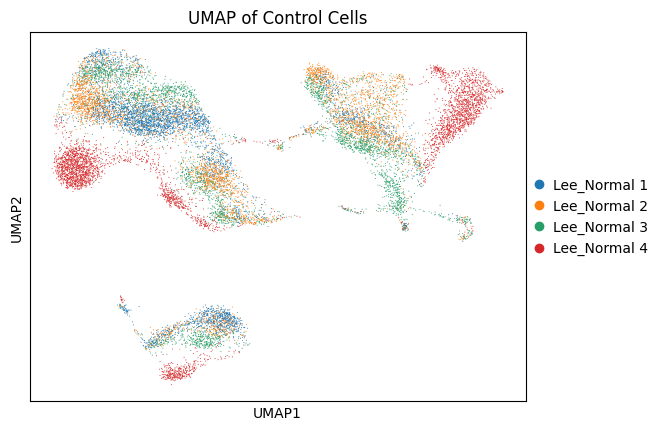

In [32]:
# Visualize control cells UMAP
sc.pl.umap(
    pbmc_control,
    color="sample",
    ncols=2,
    size=2,
    title="UMAP of Control Cells",
)

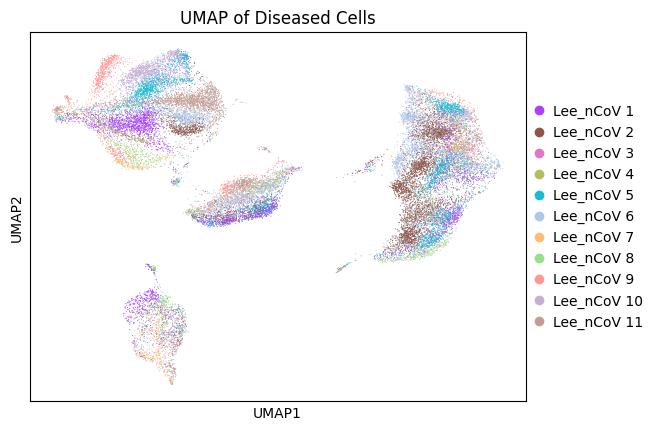

In [33]:
# Visualize umap for diseased cells
sc.pl.umap(
    pbmc_diseased,
    color="sample",
    ncols=2,
    size=2,
    title="UMAP of Diseased Cells",
)

    7. Clustering

In [34]:
# Setting clustering parameters to leiden
sc.tl.leiden(pbmc_control, flavor='igraph', n_iterations=2)
sc.tl.leiden(pbmc_diseased, flavor='igraph', n_iterations=2)

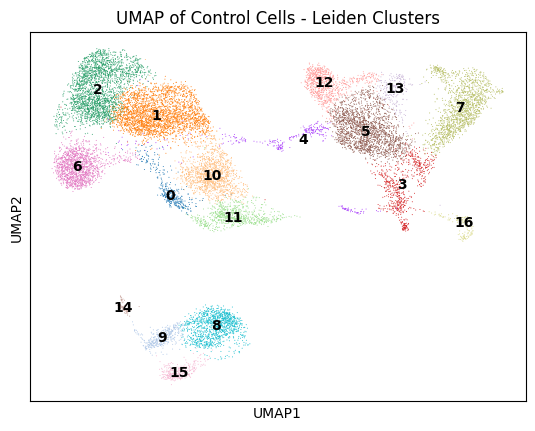

In [35]:
# Visualize umap for controled cells using leiden clusters
sc.pl.umap(
    pbmc_control,
    color="leiden",
    ncols=2,
    size=2,
    title="UMAP of Control Cells - Leiden Clusters",
    legend_loc='on data',
)

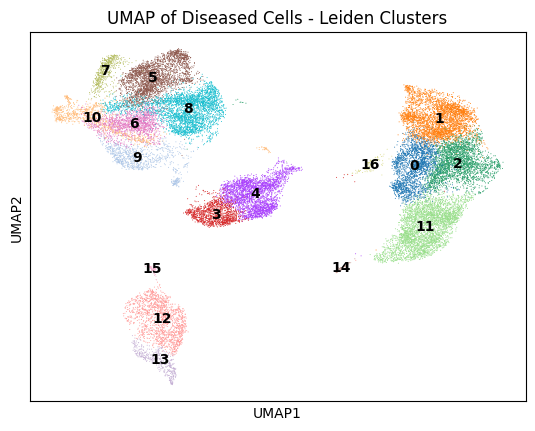

In [36]:
# Visualize umap for diseased cells using leiden clusters
sc.pl.umap(
    pbmc_diseased,
    color="leiden",
    ncols=2,
    size=2,
    title="UMAP of Diseased Cells - Leiden Clusters",
    legend_loc='on data',
)

    8. Cell Annotation

In [37]:
# Set figure parameters
sc.set_figure_params(figsize=(5,5))


In [38]:
# Annotate cell types automatically using CellTypist
# Make a copy of the data to avoid modifying the original control datasets
pbmc_control_ct = pbmc_control.copy() # Control cells

pbmc_control_ct.X = pbmc_control.layers['counts']

# Normalize the control data to 10,000 counts per cell
sc.pp.normalize_total(pbmc_control_ct, target_sum=1e4)

# Logarithmize the control data
sc.pp.log1p(pbmc_control_ct)

# Make .X dense for CellTypist
pbmc_control_ct.X = pbmc_control_ct.X.toarray()


In [39]:
# Annotate cell types for diseased dataset
pbmc_diseased_ct = pbmc_diseased.copy()
pbmc_diseased_ct.X = pbmc_diseased.layers['counts']

# Normalize the diseased data to 10,000 counts per cell 
sc.pp.normalize_total(pbmc_diseased_ct, target_sum=1e4)

# Logarithmize the diseased data
sc.pp.log1p(pbmc_diseased_ct)

# Make .X dense for CellTypist
pbmc_diseased_ct.X = pbmc_diseased_ct.X.toarray()

In [40]:
# Download celltypist models for immune cells if not already present
#models.download_models(
  #  force_update=True
#)

In [41]:
# Load the downloaded models
model_cov = models.Model.load(model='Adult_COVID19_PBMC.pkl')
model_ct = models.Model.load(model='Healthy_COVID19_PBMC.pkl')
model_low = models.Model.load(model='Immune_All_Low.pkl')
model_high = models.Model.load(model='Immune_All_High.pkl')

In [42]:
# Display the high model cell types
model_cov.cell_types

array(['Activated Granulocyte', 'B', 'CD14 Monocyte', 'CD16 Monocyte',
       'CD4 T', 'CD4m T', 'CD4n T', 'CD8eff T', 'CD8m T',
       'Class-switched B', 'DC', 'IgA PB', 'IgG PB', 'NK', 'Neutrophil',
       'Platelet', 'RBC', 'SC & Eosinophil', 'gd T', 'pDC'], dtype=object)

In [43]:
# Display the low model cell types
model_ct.cell_types

array(['ASDC', 'B_exhausted', 'B_immature', 'B_malignant', 'B_naive',
       'B_non-switched_memory', 'B_switched_memory', 'C1_CD16_mono',
       'CD14_mono', 'CD16_mono', 'CD4.CM', 'CD4.EM', 'CD4.IL22',
       'CD4.Naive', 'CD4.Prolif', 'CD4.Tfh', 'CD4.Th1', 'CD4.Th17',
       'CD4.Th2', 'CD8.EM', 'CD8.Naive', 'CD8.Prolif', 'CD8.TE',
       'CD83_CD14_mono', 'DC1', 'DC2', 'DC3', 'DC_prolif', 'HSC_CD38neg',
       'HSC_CD38pos', 'HSC_MK', 'HSC_erythroid', 'HSC_myeloid',
       'HSC_prolif', 'ILC1_3', 'ILC2', 'MAIT', 'Mono_prolif', 'NKT',
       'NK_16hi', 'NK_56hi', 'NK_prolif', 'Plasma_cell_IgA',
       'Plasma_cell_IgG', 'Plasma_cell_IgM', 'Plasmablast', 'Platelets',
       'RBC', 'Treg', 'gdT', 'pDC'], dtype=object)

In [44]:
# Fix var names that are incorrectly stored as categorical
pbmc_control_ct.var_names = pbmc_control_ct.var_names.astype(str)
pbmc_control_ct.var_names_make_unique()
pbmc_diseased_ct.var_names = pbmc_diseased_ct.var_names.astype(str) 
pbmc_diseased_ct.var_names_make_unique()

In [45]:
# Predict cell types for control dataset
pred_control = celltypist.annotate(
    pbmc_control_ct,
    model=model_ct,
    majority_voting=True
)

🔬 Input data has 16282 cells and 21649 genes
🔗 Matching reference genes in the model
🔗 Matching reference genes in the model
🧬 3316 features used for prediction
⚖️ Scaling input data
🧬 3316 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
🗳️ Majority voting the predictions
✅ Majority voting done!
✅ Majority voting done!


In [46]:
# View predicted cell types for control dataset
pred_control.probability_matrix

ASDC   B_exhausted    B_immature  \
Lee-AAACCCAAGCATTGTC-19  5.788663e-07  6.407693e-10  1.366467e-06   
Lee-AAACCCAAGTGTAGAT-5   1.496810e-06  2.062214e-05  1.065292e-05   
Lee-AAACCCACACAATGCT-5   1.052102e-05  2.831143e-06  9.992564e-06   
Lee-AAACCCACACCTGCTT-19  2.079967e-05  5.799137e-05  1.920812e-06   
Lee-AAACCCACATACTGAC-5   6.547190e-07  2.729696e-04  2.052197e-05   
...                               ...           ...           ...   
Lee-TTTGTTGTCCCGTAAA-13  4.646085e-06  6.875348e-07  3.603558e-06   
Lee-TTTGTTGTCCTGTAAG-19  1.177664e-05  1.146631e-05  3.264195e-05   
Lee-TTTGTTGTCGAACGCC-13  1.680070e-07  6.775085e-07  6.347841e-08   
Lee-TTTGTTGTCTACTGAG-14  2.781117e-07  4.990068e-07  1.754868e-07   
Lee-TTTGTTGTCTGGGATT-19  3.500790e-03  6.268187e-07  3.655031e-06   

                          B_malignant       B_naive  B_non-switched_memory  \
Lee-AAACCCAAGCATTGTC-19  3.454034e-05  3.913167e-07           6.094740e-05   
Lee-AAACCCAAGTGTAGAT-5   3.317577e-05  1.484831e-07           2.846620e-07   
Lee-AAACCCACACAATGCT-5   7.942426e-07  1.068097e-05           1.959650e-04   
Lee-AAACCCACACCTGCTT-19  8.288257e-05  3.497127e-05           4.245163e-06   
Lee-AAACCCACATACTGAC-5   6.554505e-05  6.466228e-06           1.376180e-05   
...                               ...           ...                    ...   
Lee-TTTGTTGTCCCGTAAA-13  1.255840e-06  2.274728e-05           2.483429e-04   
Lee-TTTGTTGTCCTGTAAG-19  1.055096e-04  1.324679e-06           2.306336e-06   
Lee-TTTGTTGTCGAACGCC-13  7.535009e-06  4.354210e-07           1.579215e-06   
Lee-TTTGTTGTCTACTGAG-14  3.216083e-06  1.781249e-06           8.318917e-07   
Lee-TTTGTTGTCTGGGATT-19  1.196413e-04  8.606615e-06           3.656501e-05   

                         B_switched_memory  C1_CD16_mono  CD14_mono  \
Lee-AAACCCAAGCATTGTC-19       1.259643e-04  4.696035e-07   0.000173   
Lee-AAACCCAAGTGTAGAT-5        4.749020e-04  2.467235e-06   0.000289   
Lee-AAACCCACACAATGCT-5        1.950395e-07  4.001074e-03   0.001740   
Lee-AAACCCACACCTGCTT-19       2.253119e-04  9.788956e-07   0.000096   
Lee-AAACCCACATACTGAC-5        1.869438e-05  1.332268e-04   0.000316   
...                                    ...           ...        ...   
Lee-TTTGTTGTCCCGTAAA-13       3.058520e-04  7.295531e-06   0.974261   
Lee-TTTGTTGTCCTGTAAG-19       6.280968e-07  4.683789e-05   0.001626   
Lee-TTTGTTGTCGAACGCC-13       8.265500e-05  1.064831e-05   0.751218   
Lee-TTTGTTGTCTACTGAG-14       5.640698e-05  6.888783e-06   0.922888   
Lee-TTTGTTGTCTGGGATT-19       4.542527e-06  6.438903e-05   0.002815   

                            CD16_mono  ...     NK_prolif  Plasma_cell_IgA  \
Lee-AAACCCAAGCATTGTC-19  5.057478e-08  ...  9.110463e-05         0.000009   
Lee-AAACCCAAGTGTAGAT-5   8.160204e-08  ...  1.210983e-05         0.000063   
Lee-AAACCCACACAATGCT-5   1.301906e-05  ...  9.312186e-06         0.000001   
Lee-AAACCCACACCTGCTT-19  2.346843e-07  ...  2.630514e-03         0.000076   
Lee-AAACCCACATACTGAC-5   1.092848e-06  ...  1.775055e-03         0.000280   
...                               ...  ...           ...              ...   
Lee-TTTGTTGTCCCGTAAA-13  9.021800e-04  ...  4.031754e-03         0.000122   
Lee-TTTGTTGTCCTGTAAG-19  2.300074e-08  ...  1.656047e-03         0.000292   
Lee-TTTGTTGTCGAACGCC-13  1.060890e-06  ...  5.618666e-06         0.000003   
Lee-TTTGTTGTCTACTGAG-14  5.777542e-06  ...  6.311262e-07         0.000047   
Lee-TTTGTTGTCTGGGATT-19  8.299556e-08  ...  1.399731e-03         0.000470   

                         Plasma_cell_IgG  Plasma_cell_IgM   Plasmablast  \
Lee-AAACCCAAGCATTGTC-19     4.584996e-05     8.532423e-07  3.462141e-06   
Lee-AAACCCAAGTGTAGAT-5      9.430094e-05     1.331693e-07  6.529202e-07   
Lee-AAACCCACACAATGCT-5      6.741981e-06     2.491903e-07  3.818132e-06   
Lee-AAACCCACACCTGCTT-19     5.666149e-04     4.115710e-05  2.833386e-05   
Lee-AAACCCACATACTGAC-5      2.887373e-05     4.964509e-06  7.377976e-06   
...                                  ..

In [47]:
# Predict cell types for control dataset with all immune cell types
pred_control_all_low = celltypist.annotate(
    pbmc_control_ct,
    model=model_low,
    majority_voting=True
)

🔬 Input data has 16282 cells and 21649 genes
🔗 Matching reference genes in the model
🔗 Matching reference genes in the model
🧬 5464 features used for prediction
⚖️ Scaling input data
🧬 5464 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
🗳️ Majority voting the predictions
✅ Majority voting done!
✅ Majority voting done!


In [48]:
pred_control_all_high = celltypist.annotate(
    pbmc_control_ct,
    model=model_high,
    majority_voting=True
)

🔬 Input data has 16282 cells and 21649 genes
🔗 Matching reference genes in the model
🔗 Matching reference genes in the model
🧬 5464 features used for prediction
⚖️ Scaling input data
🧬 5464 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
🗳️ Majority voting the predictions
✅ Majority voting done!
✅ Majority voting done!


    9. Visualization

Annotate and visualize cell types for control samples. I use the immune cells models, both high and low models and later visualize.

In [49]:
# Convert to anndata format
pred_control_all_low_adata = pred_control_all_low.to_adata()

In [50]:
# Add predicted labels to the original control AnnData object
pbmc_control.obs["celltypist_cell_label_fine"] = pred_control_all_low_adata.obs.loc[
    pbmc_control.obs.index, "majority_voting"
]

pbmc_control.obs["celltypist_conf_score_fine"] = pred_control_all_low_adata.obs.loc[
    pbmc_control.obs.index, "conf_score"
]

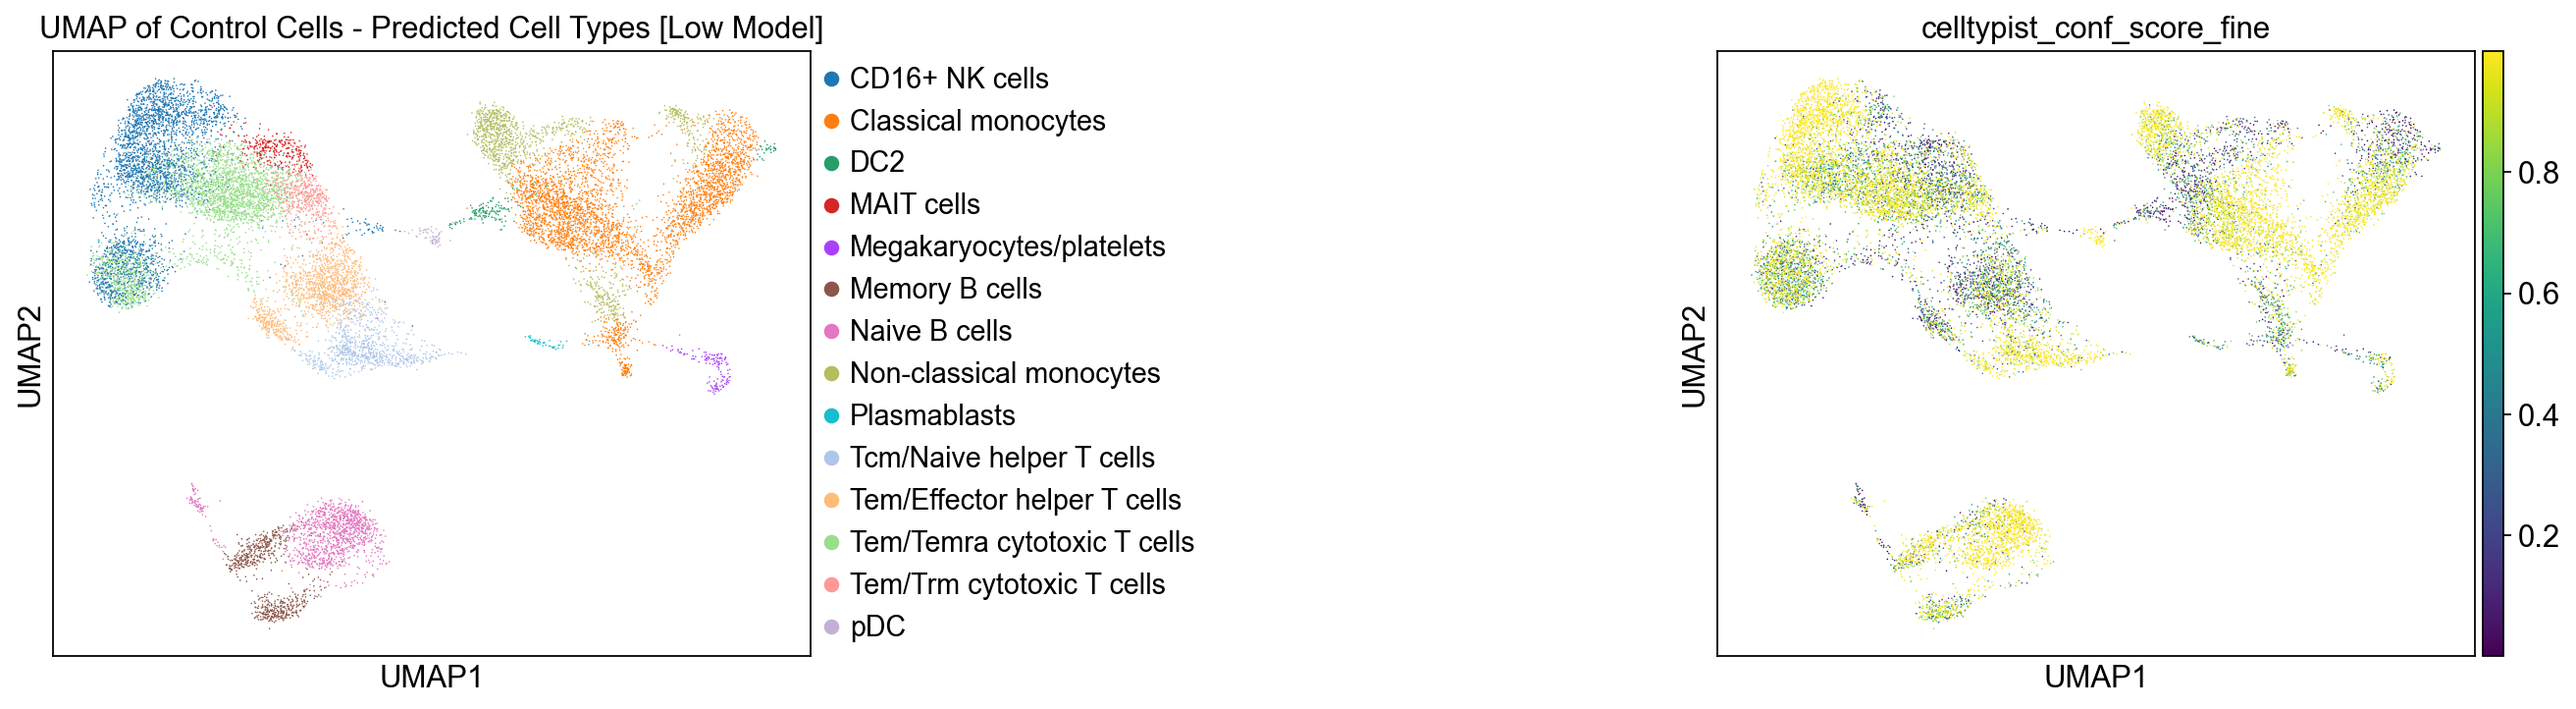

In [51]:
# Visualize predicted cell types for controlled dataset
sc.pl.umap(
    pbmc_control,
    color=["celltypist_cell_label_fine", "celltypist_conf_score_fine"],
    ncols=2,
    size=2,
    title="UMAP of Control Cells - Predicted Cell Types [Low Model]",
    wspace=1,
)

In [52]:
# Convert to anndata format
pred_control_all_high_adata = pred_control_all_high.to_adata()

In [53]:
pbmc_control.obs["celltypist_cell_label_fine_high"] = pred_control_all_high_adata.obs.loc[
    pbmc_control.obs.index, "majority_voting"
]

pbmc_control.obs["celltypist_conf_score_fine_high"] = pred_control_all_high_adata.obs.loc[
    pbmc_control.obs.index, "conf_score"
]

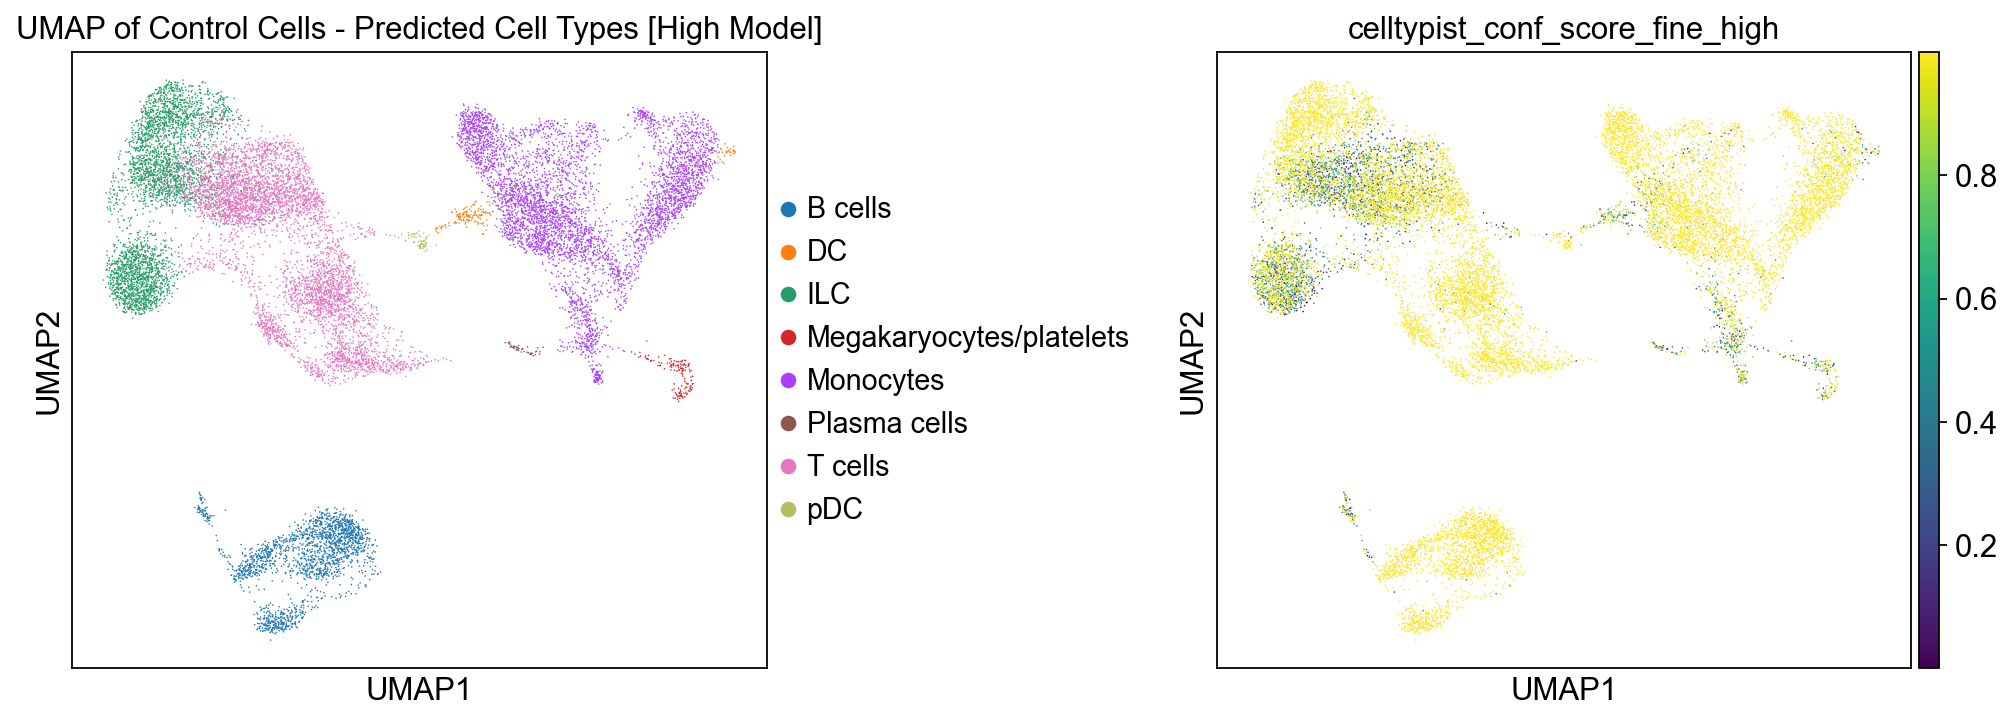

In [54]:
# Visualize predicted cell types for controlled dataset with high model
sc.pl.umap(
    pbmc_control,
    color=["celltypist_cell_label_fine_high", "celltypist_conf_score_fine_high"],
    ncols=2,
    size=2,
    title="UMAP of Control Cells - Predicted Cell Types [High Model]",
    wspace=0.5,
)

Annotate and visualize cell types for Covid-19 samples. I used both low and high models.

In [55]:
# Predict cell types for diseased dataset with low model
pred_diseased_all_low = celltypist.annotate(
    pbmc_diseased_ct,
    model=model_low,
    majority_voting=True
)

🔬 Input data has 27159 cells and 21649 genes
🔗 Matching reference genes in the model
🔗 Matching reference genes in the model
🧬 5464 features used for prediction
⚖️ Scaling input data
🧬 5464 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
🗳️ Majority voting the predictions
✅ Majority voting done!
✅ Majority voting done!


In [56]:

# Convert to anndata format
pred_diseased_all_low_adata = pred_diseased_all_low.to_adata()

In [57]:
# Add predicted labels to the original control AnnData object
pbmc_diseased.obs["celltypist_cell_label_fine"] = pred_diseased_all_low_adata.obs.loc[
    pbmc_diseased.obs.index, "majority_voting"
]

pbmc_diseased.obs["celltypist_conf_score_fine"] = pred_diseased_all_low_adata.obs.loc[
    pbmc_diseased.obs.index, "conf_score"
]

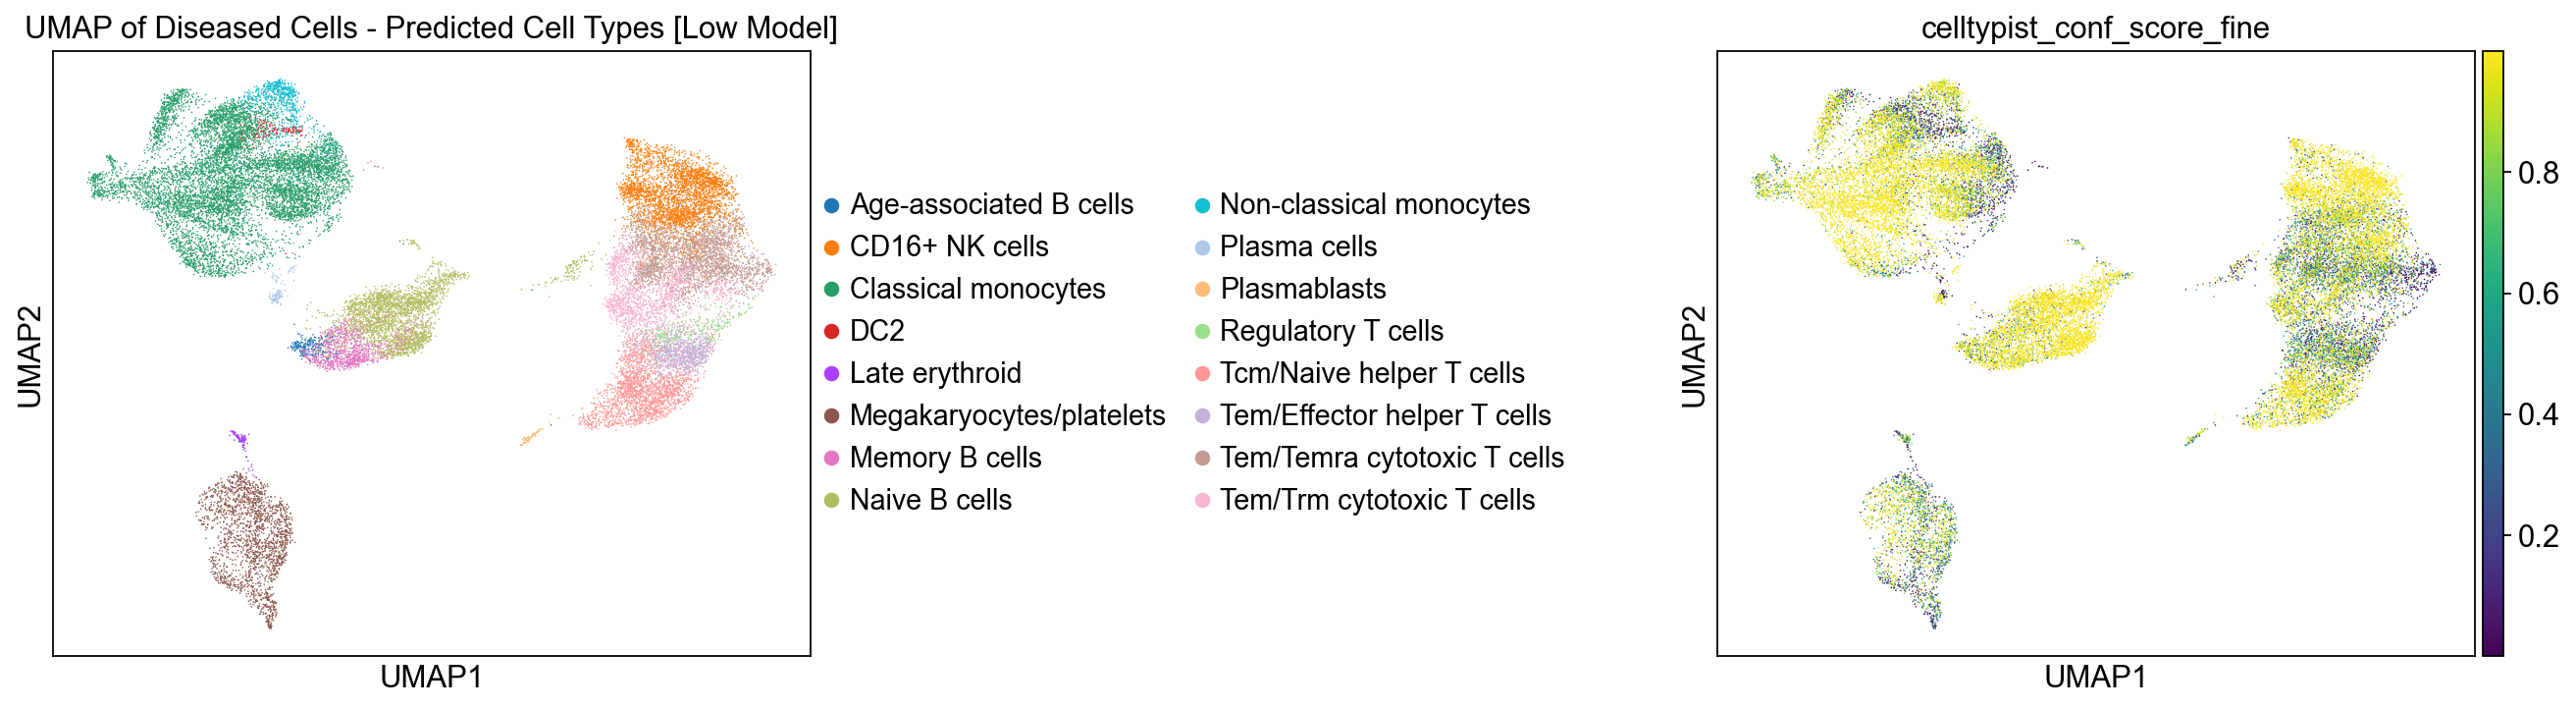

In [58]:
# Visualize predicted cell types for diseased dataset
sc.pl.umap(
    pbmc_diseased,
    color=["celltypist_cell_label_fine", "celltypist_conf_score_fine"],
    ncols=2,
    size=2,
    title="UMAP of Diseased Cells - Predicted Cell Types [Low Model]",
    wspace=1,
)

In [59]:
# Predict cell types for diseased dataset with high model
pred_diseased_all_high = celltypist.annotate(
    pbmc_diseased_ct,
    model=model_high,
    majority_voting=True
)

🔬 Input data has 27159 cells and 21649 genes
🔗 Matching reference genes in the model
🔗 Matching reference genes in the model
🧬 5464 features used for prediction
⚖️ Scaling input data
🧬 5464 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
🗳️ Majority voting the predictions
✅ Majority voting done!
✅ Majority voting done!


In [60]:
# Convert to anndata format
pred_diseased_all_high_adata = pred_diseased_all_high.to_adata()

In [61]:
pbmc_diseased.obs["celltypist_cell_label_fine_high"] = pred_diseased_all_high_adata.obs.loc[
    pbmc_diseased.obs.index, "majority_voting"
]

pbmc_diseased.obs["celltypist_conf_score_fine_high"] = pred_diseased_all_high_adata.obs.loc[
    pbmc_diseased.obs.index, "conf_score"
]

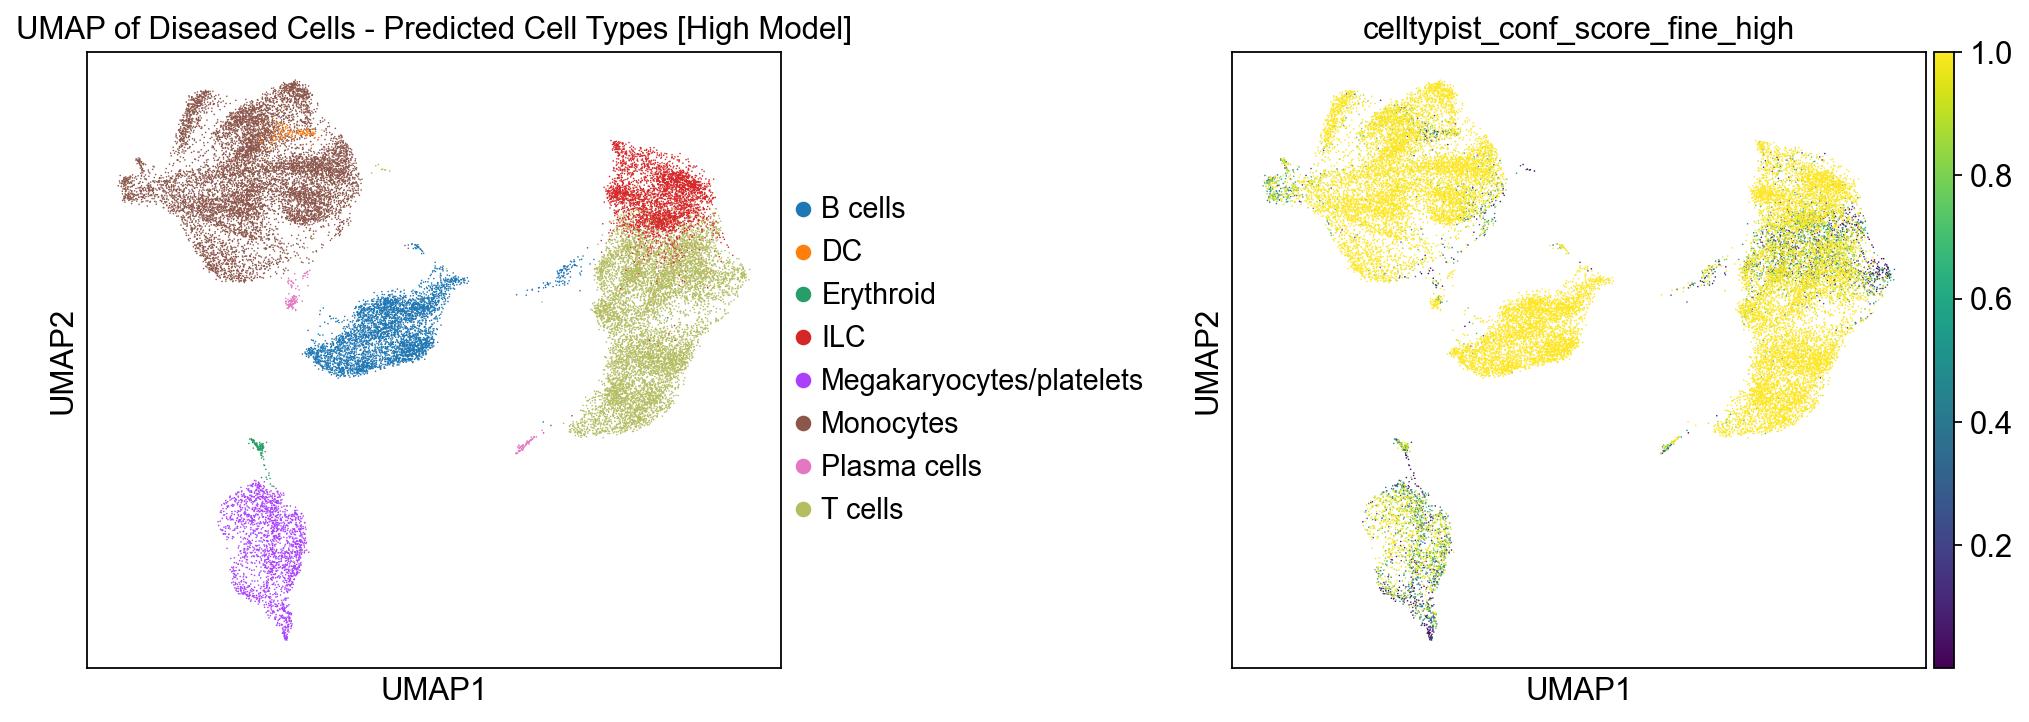

In [62]:
# Visualize predicted cell types for controlled dataset
sc.pl.umap(
    pbmc_diseased,
    color=["celltypist_cell_label_fine_high", "celltypist_conf_score_fine_high"],
    ncols=2,
    size=2,
    title="UMAP of Diseased Cells - Predicted Cell Types [High Model]",
    wspace=0.5,
)

    10. Differential Gene Expression 

In [71]:
# Logarithmize the data again for differential gene expression analysis
pbmc_covid19_copy = pbmc_covid19.copy()
sc.pp.normalize_total(pbmc_covid19_copy, target_sum=1e4)

sc.pp.log1p(pbmc_covid19_copy)

In [85]:
# Perform differential gene expression analysis between control and diseased cells
sc.tl.rank_genes_groups(
    pbmc_covid19_copy,
    groupby="group",
    reference="control",
    method="t-test",
    use_raw=False,
    n_genes=25,
)

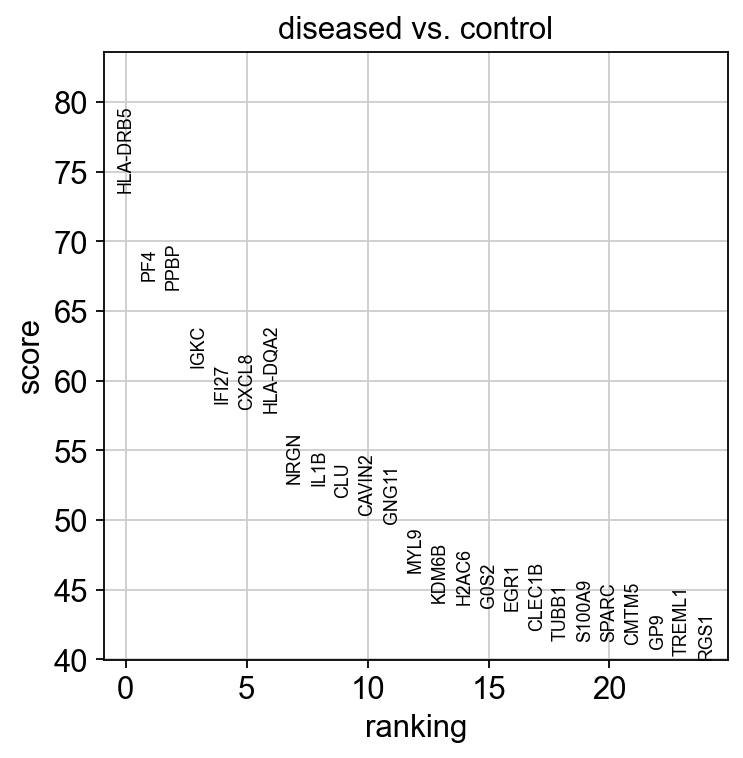

In [86]:
sc.pl.rank_genes_groups(
    pbmc_covid19_copy,
    groupby="group",
    reference="control",
    method="t-test",
    use_raw=False,
    n_genes=25,
)

After performing the differentially expressed genes between control and diseased cells, *HLA-DRB5* 